In [21]:
import random
import numpy as np 
import math

def sample_line(n, p):
    
    dir_vec = np.random.randn(3) ;
    line_point = p ;
    parameter = np.transpose(np.random.randn(n)[np.newaxis]) ;
    line_points = line_point + parameter*dir_vec ;
      
    return line_points

In [22]:
import numpy as np

#Outputs n sample points from a random plane and m sample points from a line intersecting said random plane.
def plane_line(n, m) :
    sample_p = sample_plane(n)
    
    # Construct a random line through point sample_p[0]
    line_point = sample_p[0] 
    dir_vec = np.random.randn(3) 
    parameter = np.transpose(np.random.random(m)[np.newaxis])
    sample_l = line_point + parameter*dir_vec
    
    #The first element is an array of the n sample points from the plane.
    #The second element is an array of the m sample points from the line.
    return [sample_p, sample_l]

In [23]:
import numpy as np 

# Outputs n sample points from a random plane in R^3 as a matrix of the form nx3.
def sample_plane(n):
    
    normal_vec = 2*(np.random.random(3)-1/2)
    point_plane = 2*(np.random.random(3)-1/2) 
    plane_points = [] 
    
    #Points on the plane must satisfy the equation (n1,n2,n3).(x-p1, y-p2, z-p3) = 0, where . operation 
    #represents the dot product and (n1,n2,n3) is the normal vector and (p1,p2,p3) is a point on the plane.
    #We randomly sample for x and y and solve for z using the above equation. 
    for int in range(n) :
        sample_2coord = 2*(np.random.random(2)-1/2) 
        last_coord = sample_2coord - point_plane[0:2] 
        last_coord = -(np.dot(normal_vec[0:2], last_coord)-
                       normal_vec[2]*point_plane[2])/normal_vec[2] 
        sample_2coord = np.append(sample_2coord, last_coord) 
        plane_points = np.append(plane_points,sample_2coord)
   
    plane_points = np.reshape(plane_points, (n,3))    
         
    return plane_points

In [24]:
import numpy as np


def sample_sphere(n, c):
    """
    Outputs sample points from a random sphere in R^3 centered at c as a matrix 
    of the form nx3
    :param n: No. of points to be sampled
    :param c: Vector - Coordinates for center of sphere [x,y,z]
    :return: Coordinates of the n points on the sphere [x,y,z]
    Note: We use the last construction found in http://mathworld.wolfram.com/SpherePointPicking.html
    """
    vec = 2*(np.random.random((3, n))-1/2)
    vec /= np.linalg.norm(vec, axis=0)
    recenter = np.repeat(c, n)
    recenter = np.reshape(recenter, (3, n))
    vec = vec + recenter
    
    return np.transpose(vec)


In [25]:
import numpy as np
from numpy import linalg as LA
#import sample_sphere as ss
#from sample_sphere import *

def plane_sphere(n, c, m) :
    """
    Constructs n sample points from a unit sphere centered at c and
    m sample points from a plane which intersects the unit sphere.
    If there are any k points from the m sample points that is contained
    in the unit sphere, we remove them and outputs only the m-k sample points.
    i.e. we do not produce any sample points inside the unit sphere. 
    """
    sphere = sample_sphere(n, c) 
    
    #We construct the plane containing the first 3 sample points 
    #sample_s[0:3] on the sphere. 
    plane_points = sphere[0:3]
    #Finding the normal vector
    vec1 = plane_points[1]-plane_points[0] 
    vec2 = plane_points[2]-plane_points[0] 
    #Normal vector 
    normal_vec = np.cross(vec1, vec2) 
    
    #Points on the plane must satisfy the equation 
    #(n1,n2,n3).(x-p1, y-p2, z-p3) = 0, where . operation 
    #represents the dot product and (n1,n2,n3) is the normal vector and 
    #(p1,p2,p3) is a point on the plane (we call it p0 in the code below).
    #We randomly sample for x and y and solve for z using the above equation. 
    p0=plane_points[0]
    for int in range(m) :
        sample_coord = 2*(np.random.random(2)-1/2) 
        first_coords = sample_coord - p0[0:2]
        last_coord = -(np.dot(normal_vec[0:2], first_coords)-
                       normal_vec[2]*p0[2])/normal_vec[2] 
        sample_coord = np.append(sample_coord, last_coord) 
        plane_points = np.append(plane_points,sample_coord)
    
    plane_points = np.reshape(plane_points, (m+3,3))
    
    #We remove any points on the plane that is inside the unit sphere.
    relevant_points = []
    for i in range(m+3) :
        if LA.norm(plane_points[i]-c)>=1 :
            relevant_points = np.append(relevant_points, plane_points[i])
        
    relevant_points =np.reshape(relevant_points, (-1,3))
    
    return [sphere, relevant_points]

In [26]:
import numpy as np
from numpy import linalg as LA
def line_plane_sphere(k, n, c, m) :
    
    ps = plane_sphere(n, c, m) 
    plane = ps[0] 
    sphere = ps[1] 
    #combin_ps = np.reshape(np.append(sphere, plane), (-1,3)) 
    plane_tup = list(tuple(row) for row in plane)
    sphere_tup = list(tuple(row) for row in sphere)
    intersection = np.array([list(item) for item in 
                    set(plane_tup).intersection(sphere_tup)]) 
    if len(intersection) == 0 :
        return ["intersection empty", intersection]
    line = sample_line(k, intersection[0])
    
    #We remove any points on the plane that is inside the unit sphere.
    rel_line_pts = []
    for i in range(k) :
        if LA.norm(line[i]-c)>=1 :
            rel_line_pts = np.append(rel_line_pts, line[i])
        
    rel_line_pts =np.reshape(rel_line_pts, (-1,3))
    
    return [rel_line_pts, plane, sphere]

In [27]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
#%matplotlib inline

def plot_objects(X) :
    fig = plt.figure() 
    ax = fig.add_subplot(111, projection='3d')
    if len(X)==2 :
        A = X[0]
        B = X[1]
        ax.scatter(A[:,0],A[:,1], A[:,2]) 
        ax.scatter(B[:,0],B[:,1], B[:,2], color = 'c')
        plt.show()
    else:
        if len(X)==3 :
            A = X[0]
            B = X[1]
            C = X[2]
            ax.scatter(A[:,0],A[:,1], A[:,2]) 
            ax.scatter(B[:,0],B[:,1], B[:,2], color = 'c')
            ax.scatter(C[:,0],C[:,1], C[:,2], color = 'r')
            plt.show()
        else:
            ax.scatter(X[:,0],X[:,1], X[:,2])
            plt.show()

In [28]:
import numpy as np
import scipy.spatial as spatial

def neighborhood(data, point, rad) :
    coord_set = list(tuple(row) for row in data)
    tree = spatial.cKDTree(coord_set)
    
    return tree.data[tree.query_ball_point(point, rad)]

## plot objects

In [29]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
#%matplotlib inline

def plot_objects(X) :
    fig = plt.figure() 
    ax = fig.add_subplot(111, projection='3d')
    if len(X)==2 :
        A = X[0]
        B = X[1]
        ax.scatter(A[:,0],A[:,1], A[:,2]) 
        ax.scatter(B[:,0],B[:,1], B[:,2], color = 'c')
        plt.show()
    else:
        if len(X)==3 :
            A = X[0]
            B = X[1]
            C = X[2]
            ax.scatter(A[:,0],A[:,1], A[:,2]) 
            ax.scatter(B[:,0],B[:,1], B[:,2], color = 'c')
            ax.scatter(C[:,0],C[:,1], C[:,2], color = 'r')
            plt.show()
        else:
            ax.scatter(X[:,0],X[:,1], X[:,2])
            plt.show()

In [30]:
import numpy as np
from random import randint
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from pylab import figure


def visualize_3d(data, dim_list):

    # Color Map
    """

    :param data: coordinates of 'n' points [x,y,z]
    :param dim_list: list of intrinsic dimension of 'n' points
    """
    c_map = {1: 'r', 2: 'g', 3: 'b'}

    # Set up axes , fig
    fig = figure(figsize=(20, 15))
    ax = Axes3D(fig)

    try:
        # Set up 3-D Scatter plot
        for row in range(len(data)):
            ax.scatter(data[row][0], data[row][1], data[row][2], c=c_map[dim_list[row]])

        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        pyplot.show()

    except Exception as e:
        print("Error -", e)
        print("An error was encountered. Check data type of inputs. Also first two parameters should have same number \
        of elements. ")

        
def visualize_col(data, col):

    # Color Map
    """

    :param data: coordinates of 'n' points [x,y,z]
    :param dim_list: list of intrinsic dimension of 'n' points
    """

    # Set up axes , fig
    fig = figure(figsize=(20, 15))
    ax = Axes3D(fig)

    try:
        # Set up 3-D Scatter plot
        for row in range(len(data)):
            ax.scatter(data[row][0], data[row][1], data[row][2], c=col)

        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        pyplot.show()

    except Exception as e:
        print("Error -", e)
        print("An error was encountered. Check data type of inputs. Col should be a character ")


### Center Data

In [31]:
def center_data(data):
    mean = data.mean(axis=0)
    new_data = data - mean[np.newaxis,:]
    return new_data

### Neighbourhoods

In [32]:
import scipy.spatial as spatial

def neighborhood(data, point, rad) :
    coord_set = list(tuple(row) for row in data)
    tree = spatial.cKDTree(coord_set)
    return tree.data[tree.query_ball_point(point, rad)]

## Intrinsic Dimension

In [33]:
sphere_data = sample_sphere(1000, [0,0,0])

In [34]:
import math
import numpy.linalg as ln

def intrinsic_dimension(data, K, thresh):
    output = [[]]
    dim_data = data.shape[1]
    K_check = round(K * math.log(K,2))
    for p in data:
        rad = 1 #radius
        int_dim = 3 #default intrinsic dimension
        int_dim_rad = rad  #radius of the intrinsic dimension
        subset = neighborhood(data,p,rad)
        cardinality = subset.shape[0]
        while(cardinality>K_check and rad > 0.03):
            subset_centered = center_data(subset)
            _,D,_ = ln.svd(subset_centered)
            D_sq = D**2
            TV = np.sum(D_sq)
            CRV = np.cumsum(D_sq)/TV
            i, = np.where(CRV >= thresh) #returns all positions with CRV>=threshaold
            i = i[0]+1 #take only the first position of the i array
            if i < int_dim: 
                int_dim = i
                int_dim_rad = rad
                int_dim_card = cardinality
            rad = rad/2
            subset = neighborhood(subset,p,rad)
            cardinality = subset.shape[0]
        output.append([p,int_dim_card,int_dim_rad,int_dim])
    
    return output

In [35]:
idim = intrinsic_dimension(sphere_data,3,0.95)

In [36]:
idim = idim[1:]

In [37]:
len(idim)

1000

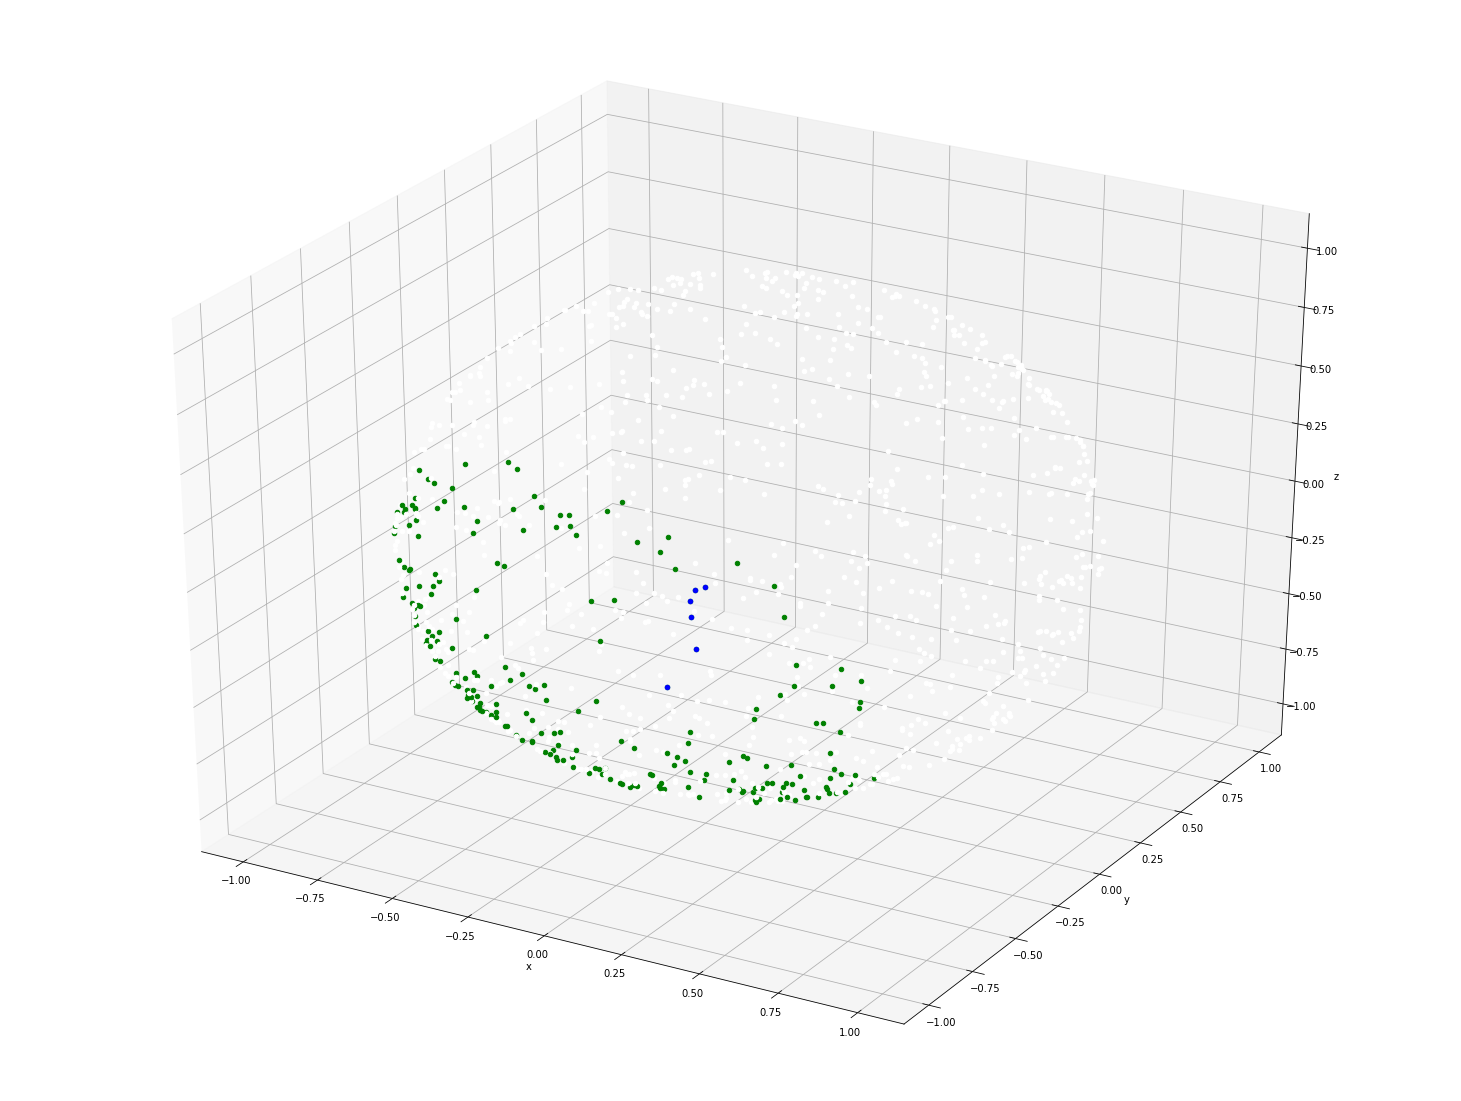

In [46]:
import pandas as pd
import numpy as np

def visualize_max_nb(data):
    """

    :param data: numpy array in the format 
    ['coordinate_of_points ['x','y','z','cardinality','intrinsic_dimension_radius','intrinsic_dimension']
    """
    data_df = pd.DataFrame(data, columns = ['coord_point','card','rad','intdim'])
    data_df['card/intdim'] = data_df['card']/data_df['intdim']
    
    # Find points with max ('card/intdim') for each intrinsic dimension
    
    max_pts = []

        
    for i in range(1,3):
        idim_df1 = idim_df[(idim_df.intdim==i)]
        max_pts.append(idim_df1.iloc[np.where(idim_df['card/intdim'].max)])

    # Find neighborhood of each max Point
    max_nb = []

    for j in max_pts: 
         max_nb.append(neighborhood(idim_df['coord_point'],j.iloc[0][0], j.iloc[0][2]))

    # Set up 3D Figure for Visulization

    fig = figure(figsize=(20, 15))
    ax = Axes3D(fig)

    # Plot all points in white
    datapointsAll = data_df['coord_point']
    for row in range(len(datapointsAll)):
        ax.scatter(datapointsAll[row][0], datapointsAll[row][1], datapointsAll[row][2], c='w')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')

    # Plot points in neighbourhood of max point of intrinsic dimension 3 in red
    if(len(max_nb)>2):
        datapoints3 = max_nb[2]
        for row in range(len(datapoints3)):
            ax.scatter(datapoints3[row][0], datapoints3[row][1], datapoints3[row][2], c='r')
            ax.set_xlabel('x')
            ax.set_ylabel('y')
            ax.set_zlabel('z')
    
    # Plot points in neighbourhood of max point of intrinsic dimension 2 in green
    if(len(max_nb)>1):
        datapoints2 = max_nb[1]
        for row in range(len(datapoints2)):
            ax.scatter(datapoints2[row][0], datapoints2[row][1], datapoints2[row][2], c='g')
            ax.set_xlabel('x')
            ax.set_ylabel('y')
            ax.set_zlabel('z')
            
    # Plot points in neighbourhood of max point of intrinsic dimension 1 in blue

    datapoints1 = max_nb[0]
    for row in range(len(datapoints1)):
        ax.scatter(datapoints1[row][0], datapoints1[row][1], datapoints1[row][2], c='b')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')

    pyplot.show()

visualize_max_nb(idim)

# Cross Table
#pd.crosstab(idim_df['intdim'],idim_df['rad'],rownames=['intdim'],colnames=['radii'])


## LIDAR

In [14]:
import pandas as pd

col_names=['X','Y','Z']
# Convert the file into a Pandas DF. Ignore first line (header=0) and use col_names as headers instead.
# Play around with this df and generalize the outcomes for the other 7 files

df = pd.read_csv('Bridge_87K.csv', names=col_names)
df.head(10)

,X,Y,Z
0,545899.787,4186145.146,1.026
1,545899.194,4186144.697,1.076
2,545898.574,4186144.223,0.930
3,545897.800,4186144.092,1.003
4,545898.349,4186146.169,1.058
5,545897.751,4186145.716,1.028
6,545898.263,4186146.692,0.926
7,545899.488,4186147.628,1.057
8,545899.045,4186148.848,1.022
9,545896.366,4186149.063,1.172


In [15]:
df.describe()

,X,Y,Z
count,87774.000000,8.777400e+04,87774.000000
mean,545836.762912,4.186428e+06,27.941545
std,37.592941,2.007106e+02,40.862795
min,545770.000000,4.186144e+06,-45.566000
25%,545804.799500,4.186235e+06,0.489000
50%,545838.640000,4.186415e+06,0.854000
75%,545869.167000,4.186605e+06,72.412500
max,545899.999000,4.186786e+06,230.033000


In [16]:
df_XYZ=pd.concat([df['X'], df['Y'], df['Z']], axis=1)

LIDAR=np.asarray(df_XYZ,dtype=np.float32)
print(LIDAR[0])

                X            Y       Z
0      545899.787  4186145.146   1.026
1      545899.194  4186144.697   1.076
2      545898.574  4186144.223   0.930
3      545897.800  4186144.092   1.003
4      545898.349  4186146.169   1.058
5      545897.751  4186145.716   1.028
6      545898.263  4186146.692   0.926
7      545899.488  4186147.628   1.057
8      545899.045  4186148.848   1.022
9      545896.366  4186149.063   1.172
10     545887.983  4186144.055  98.905
11     545888.312  4186144.151  80.857
12     545888.861  4186144.569  80.865
13     545890.766  4186146.925   0.854
14     545886.812  4186144.549  72.722
15     545888.719  4186146.765  98.867
16     545886.439  4186144.882  81.701
17     545890.826  4186147.549   1.008
18     545894.043  4186151.566   1.242
19     545892.219  4186150.177   0.943
20     545883.364  4186144.009   0.991
21     545884.535  4186144.901   1.004
22     545896.449  4186155.651   1.015
23     545895.837  4186155.185   0.999
24     545888.030  418614

In [17]:
df_XYZ.head(10)

,X,Y,Z
0,545899.787,4186145.146,1.026
1,545899.194,4186144.697,1.076
2,545898.574,4186144.223,0.930
3,545897.800,4186144.092,1.003
4,545898.349,4186146.169,1.058
5,545897.751,4186145.716,1.028
6,545898.263,4186146.692,0.926
7,545899.488,4186147.628,1.057
8,545899.045,4186148.848,1.022
9,545896.366,4186149.063,1.172


In [18]:
LIDAR

array([[  5.45899812e+05,   4.18614525e+06,   1.02600002e+00],
       [  5.45899188e+05,   4.18614475e+06,   1.07599998e+00],
       [  5.45898562e+05,   4.18614425e+06,   9.30000007e-01],
       ..., 
       [  5.45774625e+05,   4.18678550e+06,   6.92669983e+01],
       [  5.45775188e+05,   4.18678550e+06,   6.71510010e+01],
       [  5.45775812e+05,   4.18678575e+06,   6.70029984e+01]], dtype=float32)

## put the points inside a unit cube

In [39]:
#formula = (point-col_min)/(col_max-col_min)
#this will put all points between 0 and 1
mini = np.amin(LIDAR, axis=0) #get columnwise minimum
maxi = np.amax(LIDAR, axis=0)  #get columnwise maximum
divi = maxi - mini #get the divisor
LIDAR_norm = (LIDAR - mini) / divi
print(np.amax(LIDAR_norm,axis=0))
print(np.amin(LIDAR_norm,axis=0))

[ 1.  1.  1.]
[ 0.  0.  0.]


In [42]:
LIDAR_norm[:20000]

array([[  9.98557687e-01,   1.94704055e-03,   1.69057235e-01],
       [  9.93749976e-01,   1.16822426e-03,   1.69238642e-01],
       [  9.88942325e-01,   3.89408087e-04,   1.68708891e-01],
       ..., 
       [  6.48557663e-01,   4.54828650e-01,   4.47341979e-01],
       [  7.60576904e-01,   4.64174449e-01,   1.67181313e-01],
       [  9.74038482e-01,   4.94548291e-01,   1.66299596e-01]], dtype=float32)

In [45]:
idim = intrinsic_dimension(LIDAR_norm[:2000],3,0.95)

In [46]:
idim

[[],
 [array([ 0.99855769,  0.00194704,  0.16905724], dtype=float32), 366, 0.25, 2],
 [array([ 0.99374998,  0.00116822,  0.16923864], dtype=float32), 368, 0.25, 2],
 [array([  9.88942325e-01,   3.89408087e-04,   1.68708891e-01], dtype=float32),
  372,
  0.25,
  2],
 [array([ 0.98317307,  0.        ,  0.16897376], dtype=float32), 375, 0.25, 2],
 [array([ 0.98750001,  0.00350467,  0.16917333], dtype=float32), 377, 0.25, 2],
 [array([ 0.9826923 ,  0.00272586,  0.16906448], dtype=float32), 382, 0.25, 2],
 [array([ 0.98653847,  0.00428349,  0.16869438], dtype=float32), 379, 0.25, 2],
 [array([ 0.99615383,  0.00584112,  0.16916971], dtype=float32), 372, 0.25, 2],
 [array([ 0.99278843,  0.00739875,  0.16904271], dtype=float32), 378, 0.25, 2],
 [array([ 0.9721154 ,  0.00778816,  0.16958699], dtype=float32), 395, 0.25, 2],
 [array([ 0.90769231,  0.        ,  0.52420729], dtype=float32),
  14,
  0.0625,
  2],
 [array([  9.10096169e-01,   3.89408087e-04,   4.58720833e-01], dtype=float32),
  14,
 

## Word2Vec

In [47]:
data=pd.read_csv("common_processed.csv",header=0)
 
attr=data.ix[:,0:300]

attr=np.asarray(attr,dtype=np.float32)
print(attr)

words=data.ix[:,300]

[[ 0.05295624  0.0654598   0.0661953  ..., -0.03585579  0.01089464
  -0.04707221]
 [-0.00851202 -0.0342245   0.03228393 ...,  0.05151316 -0.02522733
   0.01746508]
 [-0.01236058 -0.02222988  0.06553982 ...,  0.00538979  0.04790923
  -0.1165152 ]
 ..., 
 [ 0.02223224  0.08369783  0.00973568 ..., -0.04911435  0.0133684
   0.02179631]
 [ 0.08062248 -0.00035916  0.02435828 ...,  0.05695035 -0.04305584
  -0.00411689]
 [ 0.01465028  0.02056335 -0.09813925 ..., -0.112966    0.07201585 -0.03742   ]]


C:\Users\naren\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  app.launch_new_instance()


In [52]:
data.describe()

,attrib_1,attrib_2,attrib_3,attrib_4,attrib_5,attrib_6,attrib_7,attrib_8,attrib_9,attrib_10,...,attrib_291,attrib_292,attrib_293,attrib_294,attrib_295,attrib_296,attrib_297,attrib_298,attrib_299,attrib_300
count,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,...,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000
mean,0.009171,0.017010,0.002351,0.017946,-0.012772,-0.012889,0.007280,-0.027287,0.033868,0.018307,...,-0.024386,0.000963,-0.027843,0.006639,-0.002359,-0.003988,0.004627,-0.012513,0.013607,-0.008281
std,0.054511,0.053740,0.055423,0.059537,0.055311,0.057870,0.059008,0.054684,0.055410,0.055411,...,0.056366,0.055916,0.053473,0.054764,0.055954,0.058193,0.056029,0.053857,0.053328,0.054115
min,-0.234302,-0.154381,-0.189597,-0.196018,-0.197217,-0.258530,-0.216616,-0.197658,-0.190976,-0.183664,...,-0.209048,-0.212734,-0.200084,-0.192863,-0.189647,-0.195273,-0.195853,-0.201969,-0.172457,-0.202286
25%,-0.027858,-0.019799,-0.035318,-0.021987,-0.050686,-0.052320,-0.032932,-0.062442,-0.004635,-0.018819,...,-0.062016,-0.036528,-0.064135,-0.030368,-0.042627,-0.043770,-0.033032,-0.048047,-0.022696,-0.046694
50%,0.009218,0.016485,0.002298,0.018848,-0.013360,-0.012905,0.006529,-0.027618,0.034245,0.019416,...,-0.022348,-0.001488,-0.028788,0.008497,-0.003616,-0.003400,0.004876,-0.010954,0.014374,-0.008521
75%,0.047701,0.054480,0.039293,0.058322,0.022615,0.027341,0.047222,0.007017,0.071665,0.055838,...,0.014215,0.037412,0.008771,0.043675,0.034695,0.037175,0.043248,0.023845,0.049663,0.029422
max,0.190866,0.191509,0.194071,0.221929,0.196354,0.206014,0.194112,0.151489,0.245294,0.199916,...,0.192316,0.230168,0.161889,0.171125,0.201622,0.170923,0.201401,0.159002,0.185292,0.190360


In [54]:
word2vec = np.asarray(attr,dtype=np.float32)
word2vec.shape

In [57]:
#out the points inside a unit 300 dim object
#formula = (point-col_min)/(col_max-col_min)
#this will put all points between 0 and 1
mini = np.amin(word2vec, axis=0) #get columnwise minimum
maxi = np.amax(word2vec, axis=0)  #get columnwise maximum
divi = maxi - mini #get the divisor
word2vec_norm = (word2vec - mini) / divi
print(np.amax(word2vec_norm,axis=0))
print(np.amin(word2vec_norm,axis=0))

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1

In [64]:
word2vec_norm[0]

(300,)

In [68]:
def dist(x,y):   
    return np.sqrt(np.sum((x-y)**2))

In [70]:
dist(word2vec_norm[0],word2vec_norm[500])

3.314261

In [72]:
np.sqrt(300)

17.320508075688775

In [78]:
idm = idim[1:]

In [87]:
idm = pd.DataFrame(idm)
idm.head(10)

,0,1,2,3
0,"[0.998558, 0.00194704, 0.169057]",366,0.25,2
1,"[0.99375, 0.00116822, 0.169239]",368,0.25,2
2,"[0.988942, 0.000389408, 0.168709]",372,0.25,2
3,"[0.983173, 0.0, 0.168974]",375,0.25,2
4,"[0.9875, 0.00350467, 0.169173]",377,0.25,2
5,"[0.982692, 0.00272586, 0.169064]",382,0.25,2
6,"[0.986538, 0.00428349, 0.168694]",379,0.25,2
7,"[0.996154, 0.00584112, 0.16917]",372,0.25,2
8,"[0.992788, 0.00739875, 0.169043]",378,0.25,2
9,"[0.972115, 0.00778816, 0.169587]",395,0.25,2


In [88]:
idm[4] = idm.apply(lambda row: row[1]/row[3], axis=1)

In [96]:
g = idm.sort_values([4],ascending=False)


In [98]:
g.head(1)

,0,1,2,3,4
1094,"[0.505288, 0.114875, 0.168038]",1929,0.5,2,964.5


In [107]:
for i in idm[3].unique():
    subset = idm[idm[3]==i]
    g = subset.sort_values([4],ascending=False)
    print(g.head(1))

                                   0     1    2  3      4
1094  [0.505288, 0.114875, 0.168038]  1929  0.5  2  964.5
                                  0    1    2  3           4
52  [0.906731, 0.0155763, 0.458587]  451  0.5  3  150.333333
                                   0   1      2  3     4
1083  [0.832692, 0.163941, 0.590532]  29  0.125  1  29.0


In [106]:
g

,0,1,2,3,4
1083,"[0.832692, 0.163941, 0.590532]",29,0.12500,1,29.0
1109,"[0.824038, 0.165498, 0.590289]",28,0.12500,1,28.0
1082,"[0.828365, 0.163162, 0.59055]",28,0.12500,1,28.0
1231,"[0.819231, 0.179517, 0.59776]",28,0.12500,1,28.0
1134,"[0.83125, 0.169782, 0.592767]",28,0.12500,1,28.0
1392,"[0.815385, 0.198988, 0.608264]",27,0.12500,1,27.0
1318,"[0.820673, 0.19081, 0.603736]",27,0.12500,1,27.0
1384,"[0.811538, 0.195872, 0.60662]",27,0.12500,1,27.0
396,"[0.671635, 0.0537383, 0.544494]",21,0.06250,1,21.0
1542,"[0.806731, 0.215343, 0.617179]",21,0.12500,1,21.0
